# Matthew's Part - Getting Hub Centrality

### Import Libraries & Datasets

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Import player data
df_player = pd.read_csv('paths_finished.tsv', delimiter='\t', skiprows=15)

# Import wikispeedia links
df_link = pd.read_csv('links.tsv', delimiter='\t', skiprows=11)

FileNotFoundError: ignored

### Creat Directed Graph

In [ ]:
# Create a directed graph link dataframe for wikispeedia links
G_link = nx.from_pandas_edgelist(df_link, 'linkSource', 'linkTarget', create_using=nx.DiGraph())

In [ ]:
# Create a directed graph link dataframe for player links
paths = df_player['path'].str.split(';').tolist()

#limited_paths = paths[:50]
G_player = nx.DiGraph()
for path in paths: #limited_paths
    for i in range(len(path) - 1):
        G_player.add_edge(path[i], path[i+1])

# untoggle this and use limited_paths if you want to visualize graph
plt.figure(figsize=(12, 12))

"""
# Use spring_layout with a custom k value
pos = nx.spring_layout(G_player, k=1)  # Increase k to spread nodes farther apart

nx.draw(G_player, pos, with_labels=True, node_color='skyblue', node_size=800, edge_color='black', linewidths=1, font_size=10)
plt.show()
"""

### Get Hub Centrality Measurements

In [ ]:
# Calculating centrality measurement

# Function for Degree Centrality
def get_degree_centrality(G):
    return nx.degree_centrality(G)

# Function for Betweenness Centrality
def get_betweenness_centrality(G):
    return nx.betweenness_centrality(G)

# Function for Closeness Centrality
def get_closeness_centrality(G):
    return nx.closeness_centrality(G)

# Function for Eigenvector Centrality
def get_eigenvector_centrality(G):
    return nx.eigenvector_centrality(G)

                                           Node  Degree Centrality  \
0                                  14th_century           0.010794   
1                                  15th_century           0.018470   
2                                  16th_century           0.028544   
3                                 Pacific_Ocean           0.047014   
4                                Atlantic_Ocean           0.058767   
...                                         ...                ...   
4165            United_States_Numbered_Highways           0.000240   
4166                            Valpara%C3%ADso           0.000480   
4167  War_in_Somalia_%282006%E2%80%93present%29           0.000720   
4168                  Work_%28thermodynamics%29           0.000480   
4169                                      Yagan           0.000720   

      Betweenness Centrality  Closeness Centrality  Eigenvector Centrality  
0                   0.000335              0.420622            1.434611e-02  
1    

### Hub Centrality for Player Paths

In [ ]:
# Calculate centralities for players
degree_centrality_player = get_degree_centrality(G_player)
betweenness_centrality_player = get_betweenness_centrality(G_player)
closeness_centrality_player = get_closeness_centrality(G_player)
eigenvector_centrality_player = get_eigenvector_centrality(G_player)

# Create a DataFrame for players
centrality_df_player = pd.DataFrame({
    'Node': list(G_player.nodes()),
    'Degree Centrality': [degree_centrality_player[node] for node in G_player.nodes()],
    'Betweenness Centrality': [betweenness_centrality_player[node] for node in G_player.nodes()],
    'Closeness Centrality': [closeness_centrality_player[node] for node in G_player.nodes()],
    'Eigenvector Centrality': [eigenvector_centrality_player[node] for node in G_player.nodes()]
})

print(centrality_df_player)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

# Plot distribution of each centrality measure

# Set the size of the overall figure
plt.figure(figsize=(14, 10))

# Degree Centrality Distribution
plt.subplot(2, 2, 1)
plt.hist(centrality_df_player['Degree Centrality'], bins=30, color='blue', alpha=0.7, log=True)
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')

# Betweenness Centrality Distribution
plt.subplot(2, 2, 2)
plt.hist(centrality_df_player['Betweenness Centrality'], bins=30, color='red', alpha=0.7, log=True)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')

# Closeness Centrality Distribution
plt.subplot(2, 2, 3)
plt.hist(centrality_df_player['Closeness Centrality'], bins=30, color='green', alpha=0.7, log=True)
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

# Eigenvector Centrality Distribution
plt.subplot(2, 2, 4)
plt.hist(centrality_df_player['Eigenvector Centrality'], bins=30, color='purple', alpha=0.7, log=True)
plt.title('Eigenvector Centrality Distribution')
plt.xlabel('Eigenvector Centrality')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


### Hub Centrality for Wikipedia

In [ ]:
# Calculate centralities for wikipedia
degree_centrality_links = get_degree_centrality(G_link)
betweenness_centrality_links = get_betweenness_centrality(G_link)
closeness_centrality_links = get_closeness_centrality(G_link)
eigenvector_centrality_links = get_eigenvector_centrality(G_link)

# Create a DataFrame for players
centrality_df_links = pd.DataFrame({
    'Node': list(G_link.nodes()),
    'Degree Centrality': [degree_centrality_links[node] for node in G_link.nodes()],
    'Betweenness Centrality': [betweenness_centrality_links[node] for node in G_link.nodes()],
    'Closeness Centrality': [closeness_centrality_links[node] for node in G_link.nodes()],
    'Eigenvector Centrality': [eigenvector_centrality_links[node] for node in G_link.nodes()]
})

print(centrality_df_links)

                                  Node  Degree Centrality  \
0     %C3%81ed%C3%A1n_mac_Gabr%C3%A1in           0.002396   
1                                 Bede           0.008495   
2                              Columba           0.005010   
3                       D%C3%A1l_Riata           0.006970   
4                        Great_Britain           0.046831   
...                                ...                ...   
4587                      Yellowhammer           0.002832   
4588                    Yotsuya_Kaidan           0.000436   
4589            You%27re_Still_the_One           0.000436   
4590                    Yungay%2C_Peru           0.000871   
4591                        Zara_Yaqob           0.001307   

      Betweenness Centrality  Closeness Centrality  Eigenvector Centrality  
0                   0.000000              0.000000            4.240657e-24  
1                   0.000136              0.355165            3.588548e-03  
2                   0.000041        

In [ ]:
print(degree_centrality_links['Closeness Centrality'])

KeyError: 'Degree Centrality'

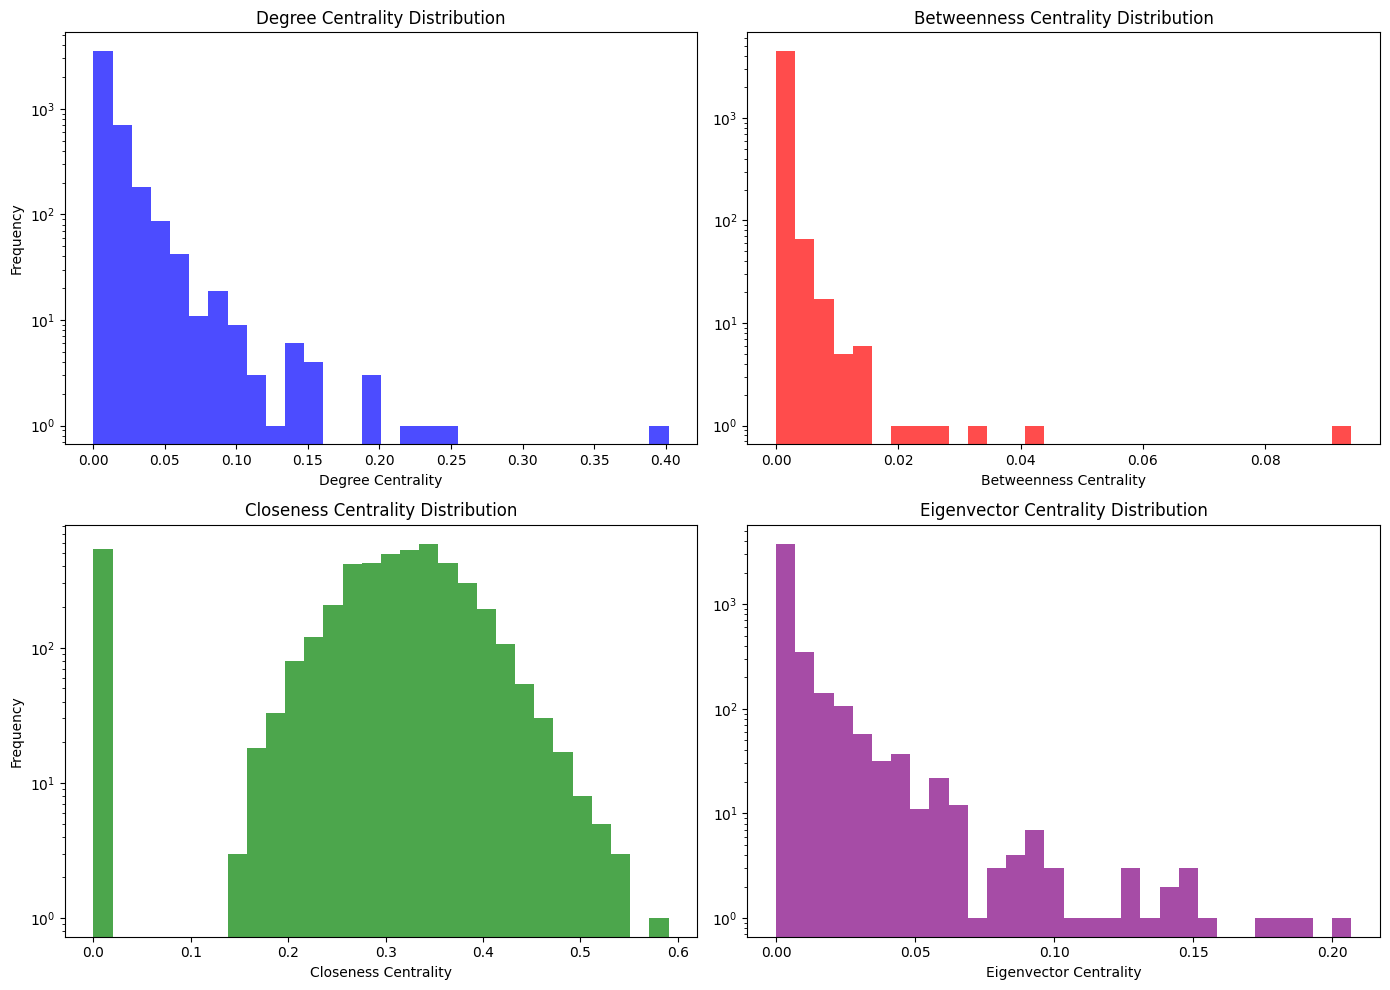

In [ ]:
import matplotlib.pyplot as plt

# Plot distribution of each centrality measure

# Set the size of the overall figure
plt.figure(figsize=(14, 10))

# Degree Centrality Distribution
plt.subplot(2, 2, 1)
plt.hist(centrality_df_links['Degree Centrality'], bins=30, color='blue', alpha=0.7,log=True)
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')

# Betweenness Centrality Distribution
plt.subplot(2, 2, 2)
plt.hist(centrality_df_links['Betweenness Centrality'], bins=30, color='red', alpha=0.7,log=True)
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')

# Closeness Centrality Distribution
plt.subplot(2, 2, 3)
plt.hist(centrality_df_links['Closeness Centrality'], bins=30, color='green', alpha=0.7, log=True)
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

# Eigenvector Centrality Distribution
plt.subplot(2, 2, 4)
plt.hist(centrality_df_links['Eigenvector Centrality'], bins=30, color='purple', alpha=0.7, log=True)
plt.title('Eigenvector Centrality Distribution')
plt.xlabel('Eigenvector Centrality')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


### Analysis

In [ ]:
# Get correlation of graphs between dataframes

# Merge on node_ID
merged_df = pd.merge(centrality_df_player, centrality_df_links, on='Node', suffixes=('_player', '_links'))

# Compute correlations for each centrality measure
correlations = {}
for measure in ['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'Eigenvector Centrality']:
    correlation = merged_df[f'{measure}_player'].corr(merged_df[f'{measure}_links'])
    correlations[measure] = correlation

# Rank the centrality measures based on correlation
ranked_measures = sorted(correlations.keys(), key=lambda x: correlations[x], reverse=True)

print("Centrality measures ranked by similarity:")
for idx, measure in enumerate(ranked_measures, 1):
    print(f"{idx}. {measure} with a correlation of {correlations[measure]:.2f}")

Centrality measures ranked by similarity:
1. Betweenness Centrality with a correlation of 0.97
2. Degree Centrality with a correlation of 0.93
3. Eigenvector Centrality with a correlation of 0.83
4. Closeness Centrality with a correlation of 0.70


In [ ]:
# Get top 10 nodes with highest betweenness centrality for df1
top_10_betweenness_df1 = centrality_df_player.nlargest(10, 'Betweenness Centrality')['Node'].tolist()

# Get top 10 nodes with highest betweenness centrality for df2
top_10_betweenness_df2 = centrality_df_links.nlargest(10, 'Betweenness Centrality')['Node'].tolist()

print(f"The top 10 nodes with the highest betweenness centrality for players are: {top_10_betweenness_df1}")
print(f"The top 10 nodes with the highest betweenness centrality for wikispeedia are: {top_10_betweenness_df2}")


The top 10 nodes with the highest betweenness centrality for players are: ['<', 'United_States', 'United_Kingdom', 'Europe', 'England', 'Africa', 'World_War_II', 'Germany', 'France', 'London']
The top 10 nodes with the highest betweenness centrality for wikispeedia are: ['United_States', 'United_Kingdom', 'England', 'Europe', 'Africa', 'Germany', 'World_War_II', '19th_century', 'London', 'English_language']


# Marie Lou's Part - Link positions

### Librairies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import unquote

### Load and transform data

In [ ]:
articles = pd.read_csv('wikispeedia_paths-and-graph/articles.tsv', sep='\t', skiprows=12, header=None)
articles.columns = ['article_names']

paths_finished = pd.read_csv('wikispeedia_paths-and-graph/paths_finished.tsv', sep='\t', skiprows=17, header=None)
paths_finished.columns = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'rating']

paths_unfinished = pd.read_csv('wikispeedia_paths-and-graph/paths_unfinished.tsv', sep='\t', skiprows=17, header=None)
paths_unfinished.columns = ['hashedIpAddress', 'timestamp', 'durationInSec', 'path', 'target', 'type']


In [ ]:
def utf_transform(data, column_path):
    ''' Function that decode the name of articles in the dataframe'''
    for index, row in data.iterrows():
        row[column_path] = unquote(row[column_path], encoding='utf-8')

In [ ]:
utf_transform(articles, 'article_names')
utf_transform(paths_finished, 'path')
utf_transform(paths_unfinished, 'path')

### Relate the link positions with game duration

**Q** Does clicking on links lower down in the article increase the duraiton of the game compared to clicking on links higher up in the article ?

In [ ]:
def link_position(data, column_path):
    ''' Function that compute the relative position of the links in the articles and the average link
        position for each paths
        column_path: name of the column in the dataframe where the paths are stored '''

    link_position = data.copy()
    link_position['link_positions'] = np.nan      #Store the positions of all links browsed along the path
    link_position['avg_link_positions'] = np.nan  #Average position of links

    for index, row in data.iterrows():
        path = row[column_path]
        path = path.split(';')

        if '<' not in path:   #Consider the path where the user don't back clicks
            positions = []    #List to store the position of each link in the considered path

            for article in path[:len(path)-1]:
                path_article = 'plaintext_articles/' + article + '.txt'

                # First, compute the number of words in the article (for the relative position)
                with open(path_article, 'r') as fp: #Open the plaintext article
                    all_text = fp.read()
                    all_words = all_text.split()
                    nb_words = len(all_words)

                # Second, read each line and find the link of the next article
                with open(path_article, 'r') as fp:
                    lines = fp.readlines()
                    for line in lines:
                        word = path[path.index(article)+1] #Find the position of the link of the next article
                        word = word.replace('_', ' ')      #If article name have '_', it should be replaced by a space

                        #Store the relative position of the first appearance of the link
                        if line.find(word) != -1:
                            positions.append(lines.index(line)/nb_words)
                            break

            link_position.at[index, 'link_positions'] = str(positions)
            link_position.at[index, 'avg_link_positions'] = np.mean(positions)

    # Drop NaN values (if link not found)
    link_position = link_position.dropna()

    return link_position

In [ ]:
## Finished paths
# Compute link positions
finished_path_link_position = link_position(paths_finished, 'path')

sns.scatterplot(x='durationInSec', y='avg_link_positions', data=finished_path_link_position)
plt.xlabel('Game duration [s]')
plt.ylabel('Relative link position')
plt.title('Finished paths');

In [ ]:
## Unfinished paths
sns.countplot(paths_unfinished, x="type"); #Type of unfinished paths

# Link positions for 'timeout' and 'restart' types
timeout_link_position = link_position(paths_unfinished[paths_unfinished['type']=='timeout'], 'path')
restart_link_position = link_position(paths_unfinished[paths_unfinished['type']=='restart'], 'path')

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

sns.scatterplot(x='durationInSec', y='avg_link_positions', data=timeout_link_position, ax=ax1)
ax1.set_title('Unfinished paths: timeout')
ax1.set_xlim([1500, 5000])
ax1.set_xlabel('')
ax1.set_ylabel('')

sns.scatterplot(x='durationInSec', y='avg_link_positions', data=restart_link_position, ax=ax2)
ax2.set_title('Unfinished paths: restart');
ax2.set_xlim([-500, 5000])
ax2.set_xlabel('')

fig.supxlabel('Game duration [s]')
fig.supylabel('Relative link position')


### Link positions for players that have done multiple games

**Q** Do players who have finished multiple paths tend to choose the first links, or do they go further into the article?

In [ ]:
# Select players that have finished between 25 and 100 games (arbitrary)
multiple_players = finished_path_link_position.value_counts('hashedIpAddress')
multiple_players = multiple_players[(multiple_players>25) & (multiple_players<100)].to_frame().reset_index()

In [ ]:
# Compute average link position of all the paths finished by 'multiple' players
multiple_players_link_position = finished_path_link_position[finished_path_link_position['hashedIpAddress'] \
                                 .isin(multiple_players['hashedIpAddress'])]
multiple_players_mean_link_position = multiple_players_link_position.groupby('hashedIpAddress')['avg_link_positions'] \
                                    .mean().to_frame().reset_index()
multiple_players_stat = pd.merge(multiple_players, multiple_players_mean_link_position, on='hashedIpAddress')

# Compute global average link position of all the paths ever finished
average_link_position = finished_path_link_position['avg_link_positions'].mean()

In [ ]:
sns.scatterplot(data=multiple_players_stat, x="count", y="avg_link_positions")
plt.axhline(average_link_position, color='r', linestyle='--', label='global average link position')
plt.xlabel('# of games')
plt.ylabel('Average link positions')
plt.legend();

**Q** Does a player who have finished multiple paths always have the same strategy? (e.g. always go for the first link)

In [ ]:
# Select players that have finished more than 10 games
multiple_players = finished_path_link_position.value_counts('hashedIpAddress')
multiple_players = multiple_players[multiple_players>10].to_frame().reset_index()

In [ ]:
# Among the 'multiple players', select one random
random_player = multiple_players.sample(1)

# Compare average link positions of the paths finished by this player
random_player_link_position = finished_path_link_position[finished_path_link_position['hashedIpAddress'] \
                                 .isin(random_player['hashedIpAddress'])]
random_player_link_position['#game'] = np.arange(1,random_player_link_position.shape[0]+1, 1)

sns.scatterplot(data=random_player_link_position, x="#game" ,y="avg_link_positions")
plt.xticks(np.arange(1,random_player_link_position.shape[0]+1, 1))
plt.tight_layout()
plt.xlabel('Game')
plt.ylabel('Average link positions');